### Bayesian Blocks

In [1]:
import numpy as np
from scipy import stats

In [2]:
np.random.seed(0)

x = np.concatenate([stats.cauchy(-5, 1.8).rvs(500),
                    stats.cauchy(-4, 0.8).rvs(2000),
                    stats.cauchy(-1, 0.3).rvs(500),
                    stats.cauchy(2, 0.8).rvs(1000),
                    stats.cauchy(4, 1.5).rvs(500)])

x = x[(x> -15) & (x < 15)]

(array([0.00376685, 0.00580723, 0.01985446, 0.1169294 , 0.07172716,
        0.06694012, 0.03861025, 0.00933866, 0.00463009, 0.001648  ]),
 array([-14.97136966, -12.0237102 ,  -9.07605075,  -6.12839129,
         -3.18073183,  -0.23307238,   2.71458708,   5.66224653,
          8.60990599,  11.55756545,  14.5052249 ]),
 <BarContainer object of 10 artists>)

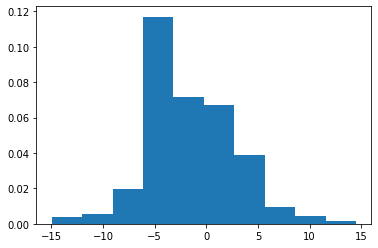

In [11]:
import pylab as pl

pl.hist(x, density=True)

(array([0.00313904, 0.00392381, 0.00392381, 0.00313904, 0.00235428,
        0.00313904, 0.00549333, 0.00392381, 0.00470857, 0.00392381,
        0.00235428, 0.00313904, 0.00549333, 0.00392381, 0.00627809,
        0.00549333, 0.00549333, 0.01020189, 0.00706285, 0.00863237,
        0.00784761, 0.00706285, 0.01334094, 0.01177142, 0.01726474,
        0.0141257 , 0.02040379, 0.02668188, 0.03295997, 0.04708566,
        0.03766853, 0.05571804, 0.06513517, 0.07141326, 0.10751227,
        0.17029315, 0.18206457, 0.20246836, 0.14831984, 0.12870082,
        0.08004563, 0.06670469, 0.04865519, 0.0463009 , 0.05571804,
        0.05257899, 0.09652561, 0.13497891, 0.09103229, 0.04473138,
        0.03139044, 0.0321752 , 0.04551614, 0.05100947, 0.05493328,
        0.08004563, 0.10829703, 0.09181705, 0.10123418, 0.07298278,
        0.06356565, 0.05022471, 0.04943995, 0.04708566, 0.03845329,
        0.03374473, 0.03766853, 0.02354283, 0.02511235, 0.01726474,
        0.01177142, 0.02040379, 0.00706285, 0.01

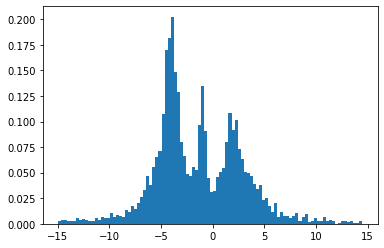

In [10]:
pl.hist(x, bins=100, density=True)

In [12]:
def bayesian_blocks(t):
    """Bayesian Blocks Implementation

    By Jake Vanderplas.  License: BSD
    Based on algorithm outlined in http://adsabs.harvard.edu/abs/2012arXiv1207.5578S

    Parameters
    ----------
    t : ndarray, length N
        data to be histogrammed

    Returns
    -------
    bins : ndarray
        array containing the (N+1) bin edges

    Notes
    -----
    This is an incomplete implementation: it may fail for some
    datasets.  Alternate fitness functions and prior forms can
    be found in the paper listed above.
    """
    # copy and sort the array
    t = np.sort(t)
    N = t.size
    
    # create length-(N + 1) array of cell edges
    edges = np.concatenate([t[:1],
                            0.5 * (t[1:] + t[:-1]),
                            t[-1:]])
    block_length = t[-1] - edges
    
    # arrays needed for the iteration
    nn_vec = np.ones(N)
    best = np.zeros(N, dtype=float)
    last = np.zeros(N, dtype=int)
    
    # Start with first data cell : add one cell at each iteration
    for K in range(N):
        # Compute the width and count of the final bin for all possible
        # locations of the K^th changepoint
        width = block_length[:K + 1] - block_length[K + 1]
        count_vec = np.cumsum(nn_vec[:K + 1][::-1])[::-1]
        
        # evaluate fitness function for these possibilities
        fit_vec = count_vec * (np.log(count_vec) - np.log(width))
        fit_vec -= 4
        fit_vec[1:] += best[:K]
        
        # find the max of the fitness : this is the K^th changepoint
        i_max = np.argmax(fit_vec)
        last[K] = i_max
        best[K] = fit_vec[i_max]
        
    # Recover changepoint by iteratively peeling off the last block
    change_points = np.zeros(N, dtype=int)
    i_cp = N
    ind = N
    while True:
        i_cp -= 1
        change_points[i_cp] = ind
        if ind == 0:
            break
        ind = last[ind - 1]
        
    change_points = change_points[i_cp:]
    
    return edges[change_points]

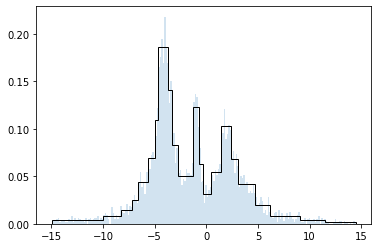

In [14]:
H1 = pl.hist(x, bins=200, histtype = 'stepfilled', alpha=0.2, density=True)

H2 = pl.hist(x, bins=bayesian_blocks(x), color='black', histtype='step', density=True)

In [15]:
bins_x = bayesian_blocks(x)

In [16]:
bins_x

array([-14.97136966,  -9.97833787,  -8.30032639,  -7.20947227,
        -6.5664823 ,  -5.61111739,  -4.93909444,  -4.63517611,
        -3.67195943,  -3.30025458,  -2.72032808,  -1.31563551,
        -0.68004784,  -0.32148883,   0.48496711,   1.39257178,
         2.36089893,   3.10617066,   4.68536101,   6.16901031,
         9.11405688,  11.53270207,  14.5052249 ])